# TFC - 2º entrega intercalar

In [72]:
#All imports used
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)

pandas: 2.1.4
numpy: 1.26.3
seaborn: 0.13.1


In [73]:
# limpeza de dados e produçao dataframe
dict = {}
study_groups = {'Music', 'Book', 'DVD'}
dfs = []
dfs_cats = []
dfs_similars = []

def read_archive():
    #archives = "teste.txt"
    archives = "amazon-meta.txt"

    file = open(archives, "r", encoding="UTF-8")
    lines = file.readlines()
    asin = None
    similarities = []
    group = None
    title = None  #--Prof-- cada objeto so tem um titulo, portanto nao ha necessidade de usar uma lista, coloca None
    customer_ids = []
    cats_list = []
    most_frequent_categories = ""


    for line in lines:
        study_line = line.strip()
        #obter o grupo
        if study_line.startswith("group: "):
            group = study_line.split(":")[1].strip()

        #obter id do produto
        if study_line.startswith("ASIN: "):
            asin = study_line.split(":")[1].strip() #--Prof-- colocar .strip()
            similarities = []

        #obter titulo do produto
        if study_line.strip().startswith("title"):
            current_title = line.split(":", 1)[1].strip()
            # Append the title to the array
            title = current_title #--Prof-- title = current_title

        #obter lista de produtos semelhantes
        if study_line.startswith("similar: ") and (group in study_groups):
            similarities = study_line.split()[2:]  #--Prof-- podes simplificar p/ similarities = study_line.split()[2:]
            #--Prof-- remover esta linha, estas a adicionar a lista a ela propria, ficando c/ duplicados
            #--Prof-- remover esta linha

        #obter categorias - 1º retiramos o espaço, 2º retiramos o '|', 3º retiramos os numero identificador da categoria
        if study_line.strip().startswith("|") and (group in study_groups):
            try:
                #obtermos a categoria na posiçao 3 (colocamos 3 no array porque contamos com o espaço)
                category = study_line.strip().split('|')[3] #--Prof-- os nomes aqui podiam estar simplificados, p.e. category em vez de word_in_cats_list e categories em vez de cats_list
                category = category.split("[")[0]
            except:
                category = ""

            cats_list.append(category)

        #obter user id e rating de utilizadores que efetuaram avaliaçoes ao produto
        if study_line.strip() and study_line[0].isdigit() and (group in study_groups):
            parts = line.split()
            user_id = parts[2]
            rating = parts[4]
            customer_ids.append(f"{user_id} - {rating}")

        #quando chegamos ao fim da  informaçao de um dado produto, vamos agregar toda a informaçao ena lista-> organized_lines
        if not study_line and (group in study_groups):
            #começamos por verificar qual a catefgoria que é mais frequente
            #--Prof-- esta linha e redundante (categories=cats_list)
            categories_count = Counter(cats_list)
            if categories_count:
              most_frequent_categories = categories_count.most_common(1)[0][0]
            else:
              most_frequent_categories = ""

            #colocamos a informaçao do produto na lista
            #--Prof-- nao faz sentido colocares as variaveis numa lista se depois
            #precisas dos elementos da lista individualmente como acontece para criares o dic (so estas a complicar a leitura)
            # nao deves criar a lista mas usar as variaveis diretamente para a criacao dos dics
            # e so depois fazes o reset das variaveis
            
            if not similarities:
                similarities = None

            if not most_frequent_categories:
                most_frequent_categories = None

            data_dict = {
                'id': asin, #--Prof-- seguindo a sugestao a cima, ficaria  'id': asin (o mesmo p/ os restantes)
                'group': group.strip("[]").replace("'", ""),
                'title': title,
                'similarities': similarities,
                'categories': most_frequent_categories,
                'reviews': customer_ids
            }
            dfs.append(data_dict)
            
            customer_ids = []
            title = None
            categories = []
            cats_list = []
            group = None

    file.close()


read_archive()
full_dataSet_dataframe = pd.DataFrame(dfs)

## Data Processing
-- Phase to of treatment of data --


In [74]:
#Delete products that do not have a similarity or category associated
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['similarities'])
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['categories'])
full_dataSet_dataframe

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516528,B000059TOC,DVD,The Drifter,"[630366704X, B0002ERXB8, B0001932ZU, B0001VTPU...",Special Features,[A32PCPZL40G5N8 - 5]
516529,B00006JBIX,DVD,The House Of Morecock,"[B0002HOE6C, B0002I84JO, B00004WZQN, B00069CQ8...",Genres,"[A24IFZUH8NLISK - 1, A2SVXZKU40G7N - 5, A3HM5G..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,"[1931709920, 188187110X, 081890643X, 158051046...",Nonfiction,[A2PD80S1N7920J - 4]
516531,B00008DDST,DVD,"1, 2, 3 Soleils: Taha, Khaled, Faudel","[B00012FWNC, B0002UNQQI, B00069FKLO, B0000CNTH...",Genres,"[A3NKS7CVEJVTQ6 - 5, A3EQ4YAZ5OEVK9 - 5, A3HRK..."


<Axes: ylabel='group'>

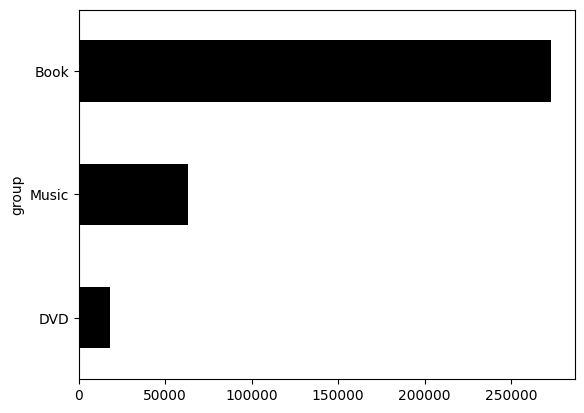

In [75]:
#This graph shows the relationship between the type of product and the quantity in the dataset
full_dataSet_dataframe.groupby('group').size().sort_values().plot(kind='barh', color='black')

In [76]:
#Count products per category
count_categories = full_dataSet_dataframe['categories'].value_counts()
count_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
                           ...  
Stephen E. Ambrose             4
Camera & Photo                 3
HOWdesign Studio               1
Camera & Photo Brands          1
Video & Music                  1
Name: count, Length: 93, dtype: int64

In [77]:
#When we look at the 10 categories with the most products, we notice that they are all books
#As the result would include Genres as one of the T
filtered_data = full_dataSet_dataframe[full_dataSet_dataframe['categories'] != 'Genres']

top_10_categories = filtered_data['categories'].value_counts().head(10)
top_10_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
Business & Investing       14745
Home & Garden              10995
History                    10481
Computers & Internet       10441
Entertainment               9078
Name: count, dtype: int64

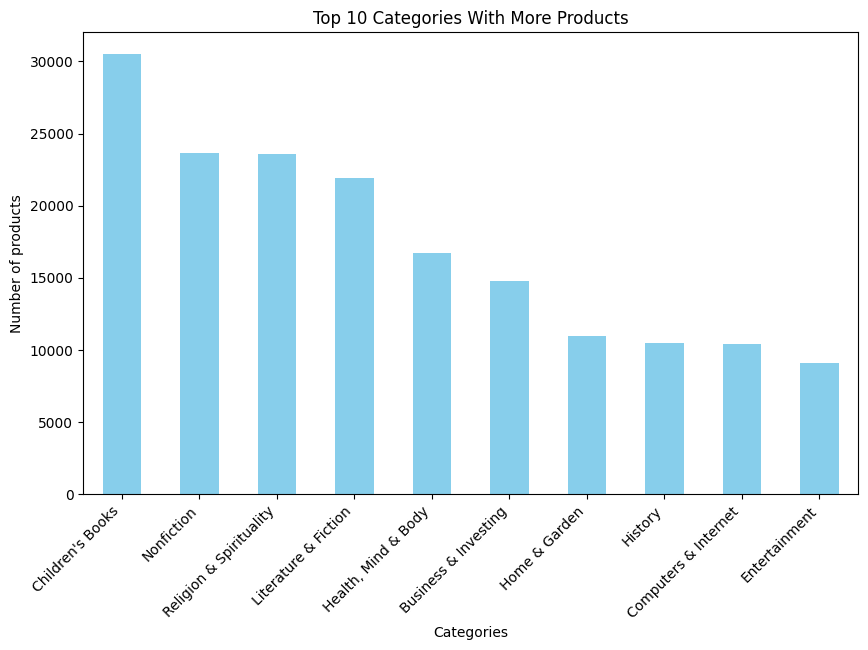

In [78]:
#Creates the bar chart for the 10 most frequent categories 
top_10_categories.plot(kind='bar', figsize=(10, 6),color='skyblue')

plt.title('Top 10 Categories With More Products')
plt.xlabel('Categories')
plt.ylabel('Number of products')

plt.xticks(rotation=45, ha='right')

plt.show()

In [79]:
#Let's see how many categories we have at first -> result 61
initial_categories = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
initial_categories['categories'].value_counts()

categories
Children's Books           30496
Nonfiction                 23670
Religion & Spirituality    23551
Literature & Fiction       21887
Health, Mind & Body        16707
                           ...  
Pop                            1
Miscellaneous                  1
Opera & Vocal                  1
HOWdesign Studio               1
Actors & Actresses             1
Name: count, Length: 61, dtype: int64

In [80]:
#Remove the categories that are not from books because they are not relevant to the study
unwanted_categories = ['jp-unknown1', 'jp-unknown2', 'jp-unknown3', 'Genres', 'Reference', 'Books on Tape','Book Clubs','Bargain Books','Books on CD',"O'Reilly",
                       'New & Used Textbooks','Home & Office','Boxed Sets','McGraw-Hill','Sheet Music & Scores','Book Accessories','Holiday Greeting Cards','Accessories',
                       'Books, Music & More','Gift Categories','Classical','Camera & Photo','Calendars', 'Libros en español','Foreign Language Books', 'Parenting & Families','Engineering'
                       'Large Print', 'Stephen E. Ambrose', 'Miscellaneous', 'HOWdesign Studio','John Wiley & Sons', 'Opera & Vocal', 'Large Print', 'Pop', 'Gay & Lesbian', 'Camera & Photo Brands'] 
book = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
book = book[~book['categories'].isin(unwanted_categories)]

book

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516511,0006176909,Book,House of Cards,"[0006471641, 0006477097, B00009MGGI, 000649799...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS..."
516512,0786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 0793529395, 0793585031, 0634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN..."
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4]
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."


In [81]:
# Qunatity of categories after removing those that are not relevant -> result = 28
book_categories = book['categories'].value_counts()

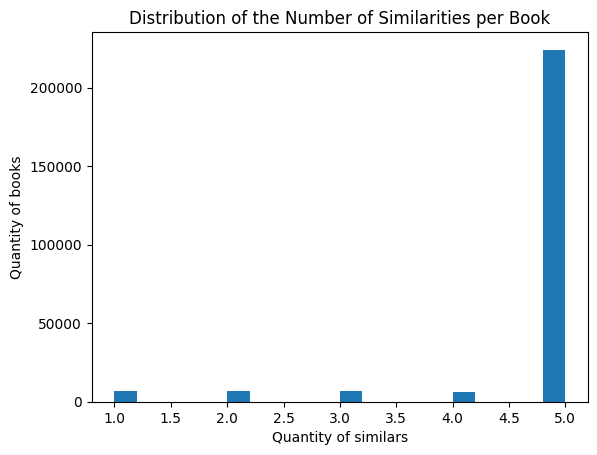

In [82]:
#In the original dataframe we have a maximum of 5 similar books per product, but that doesn't tell us much about the quantity of similars that one product actually has in the whole dataset
book['similarity_count'] = book['similarities'].apply(len)

book['similarity_count'].plot(kind='hist', bins=20) 

plt.title('Distribution of the Number of Similarities per Book')
plt.xlabel('Quantity of similars')
plt.ylabel('Quantity of books')
plt.show()

In [83]:
#Explode of the dataframe will allow us to know which and how many similar books each book has
#Analysis of this data led to the recognition that not all similar products are products that exist in the dataset itself
book_exploded = book.explode('similarities')
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [84]:
#Filtragem: Vamos ver os Ids das similarities que nao estão na coluna id e retira-los
#depois queremos saber quantas vezes é que aquelas categorias foram compradas em conjunto
book_exploded = book_exploded[book_exploded['similarities'].isin(book['id'])]
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0859531821,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0060266864,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0916291820,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [85]:
#To know how often one product appears as similar to another in the dataset
count_ids_by_similarities = book_exploded[['id','similarities']].groupby('similarities',as_index=False).count()
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152488,9997053060,2
152489,9999366651,2
152490,B00008JYQ3,6
152491,B00008NRHJ,5


In [86]:
#To know how often one product appears as similar to another in the dataset
count_ids_by_similarities_x = book_exploded[['id','similarities']].groupby('id',as_index=False).count()
count_ids_by_similarities_x.similarities.quantile(0.9)

5.0

In [87]:
# Of the values obtained by counting the quantity of similars we can observe the median, maximum and minimum values
median = count_ids_by_similarities['id'].median()
maximum = count_ids_by_similarities['id'].max()
minimum = count_ids_by_similarities['id'].min()
print(median, maximum, minimum)

3.0 295 1


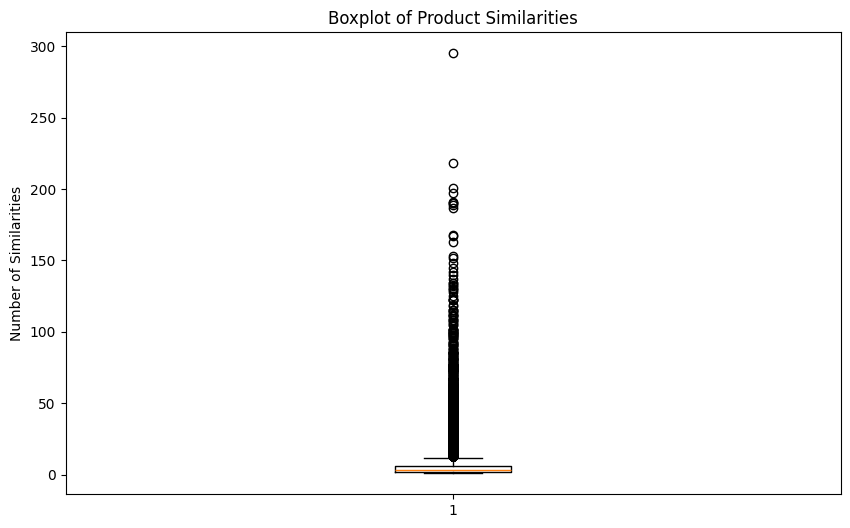

In [88]:
#Boxplot that represents count_ids_by_similarities
plt.figure(figsize=(10, 6))
plt.boxplot(count_ids_by_similarities['id'])
plt.title('Boxplot of Product Similarities')
plt.ylabel('Number of Similarities')
plt.show()


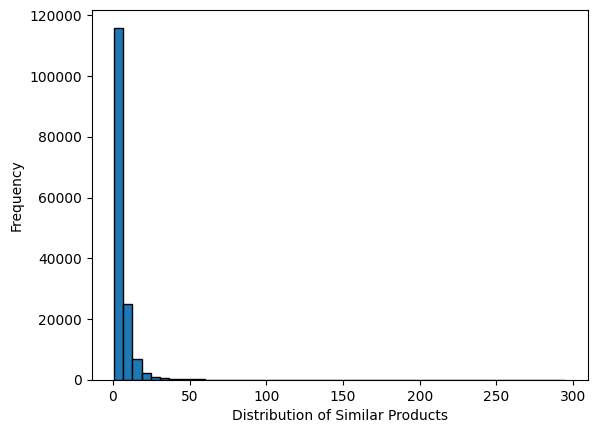

In [89]:
#Histogram that represents 
plt.hist(count_ids_by_similarities['id'], bins=50, edgecolor='black') 
plt.xlabel('Distribution of Similar Products')
plt.ylabel('Frequency')

plt.show()

In [90]:
#In order to know the best cut-off point for analyzing the data that gives us information on the relations between the percentage of products and the number of products recommended
#10% of the values are less than or equal to 1.0.
count_ids_by_similarities['id'].quantile([0.01,0.05,0.1,0.5,0.6,0.75,0.9])

0.01     1.0
0.05     1.0
0.10     1.0
0.50     3.0
0.60     4.0
0.75     6.0
0.90    11.0
Name: id, dtype: float64

## Network Category-Category
--- Process to create network category-category ---
It should be noted that during this analysis we refer to book category and book genre as the same

In [91]:
#Let's look at the relationship between the Id and the product genre. We group products by category.
study_categories = book[['categories','id']].groupby('categories')
study_categories

In [92]:
#Let's start looking in more detail at category-category and product-product relationships
merged_dataframe = pd.merge(book_exploded[['id','categories','similarities']], book[['id','categories']], left_on='similarities', right_on='id', how='left')
merged_dataframe

,id_x,categories_x,similarities,id_y,categories_y
0,0827229534,Religion & Spirituality,0804215715,0804215715,Religion & Spirituality
1,0827229534,Religion & Spirituality,156101074X,156101074X,Religion & Spirituality
2,0827229534,Religion & Spirituality,0687023955,0687023955,Religion & Spirituality
3,0827229534,Religion & Spirituality,0687074231,0687074231,Religion & Spirituality
4,0827229534,Religion & Spirituality,082721619X,082721619X,Religion & Spirituality
...,...,...,...,...,...
787569,0060537612,Children's Books,0859531821,0859531821,Children's Books
787570,0060537612,Children's Books,0060266864,0060266864,Children's Books
787571,0060537612,Children's Books,0916291820,0916291820,Children's Books
787572,0879736836,Nonfiction,1580510469,1580510469,Religion & Spirituality


In [93]:
#The columns show the related genres
merged_dataframe[['categories_x', 'categories_y']]

,categories_x,categories_y
0,Religion & Spirituality,Religion & Spirituality
1,Religion & Spirituality,Religion & Spirituality
2,Religion & Spirituality,Religion & Spirituality
3,Religion & Spirituality,Religion & Spirituality
4,Religion & Spirituality,Religion & Spirituality
...,...,...
787569,Children's Books,Children's Books
787570,Children's Books,Children's Books
787571,Children's Books,Children's Books
787572,Nonfiction,Religion & Spirituality


In [94]:
#categories_relation represents all existing relations between genres
categories_relation = merged_dataframe[['categories_x', 'categories_y']].groupby(['categories_x', 'categories_y']).size().reset_index(name='count')

---- Network Category-Category is created! Named categories_relation ----

In [95]:
#categoriess_relation representa todas as relações existentes entre generos
#a este ponto cats_relation ainda temos o erro de A->B como B->A 
categories_relation.to_csv('categories_relation.csv')


### Q1 - How often do you buy books in one genre compared to books in different genres?

#### Network Category-Category: Same Genres


In [96]:
# categories_relation is not filtered 
# consider only those that are equal - see the quantity - see the quantity of equal generos and compare with the result below that only has different ones
file_path = 'categories_relation.csv'
study_categories = pd.read_csv(file_path)
study_categories.drop(study_categories.columns[0], axis=1, inplace=True)
study_categories.columns = ['Source', 'Target', 'Weight']
study_categories

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
660,Travel,Science,249
661,Travel,Science Fiction & Fantasy,1
662,Travel,Sports,504
663,Travel,Teens,2


In [97]:
#We analyse information on the weight of products
max_weight = study_categories['Weight'].max()  # Maximum value
min_weight = study_categories['Weight'].min()  # Minimum value
average_weight = study_categories['Weight'].mean()  # Average value

print(max_weight)
print(min_weight)
print(average_weight)

99954
1
1184.3218045112783


<Axes: >

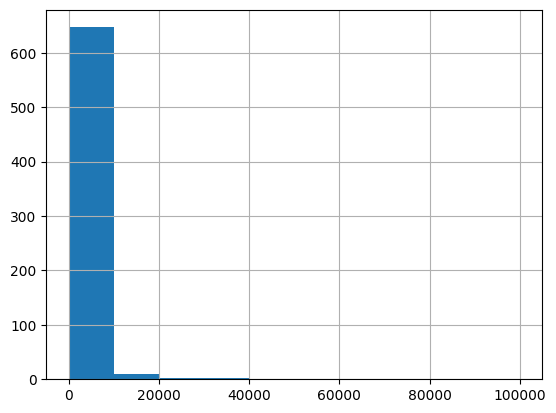

In [98]:
#Observamos que garnde parte das relaçóes existentes, um numero que chega quase aos 700, tem um peso(produtos exitentes no conjunto) perto dos 10mil
study_categories['Weight'].hist()

#### Network Category-Category: different genres
---- a partir daqui vamos filtrar o dataframe das categorias e retirar informação pertinente ao estudo ----

In [99]:
#Do resultado apresentado no grafico anterior notamos que: cats_relation apresenta relações entre generos iguais. 
#Dado esta ocorrência decidimos analisar os valores de relações entre generos iguais e generos diferentes de modo a ver o impacto destas relações na rede cats relation original!
categories_unfiltered = study_categories[study_categories['Source'] == study_categories['Target']]
categories_unfiltered.to_csv('SourceTargetEqual_csv_file.csv', index=False)

In [100]:
#Observamos assim o peso das relações entre generos literarios iguais
file_path = 'SourceTargetEqual_csv_file.csv'
unfiltered_categories = pd.read_csv(file_path)
unfiltered_categories 

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Biographies & Memoirs,Biographies & Memoirs,9216
2,Business & Investing,Business & Investing,35711
3,Children's Books,Children's Books,99954
4,Comics & Graphic Novels,Comics & Graphic Novels,5534
5,Computers & Internet,Computers & Internet,29306
6,"Cooking, Food & Wine","Cooking, Food & Wine",14204
7,Engineering,Engineering,4927
8,Entertainment,Entertainment,19480
9,"Health, Mind & Body","Health, Mind & Body",39870


<Axes: >

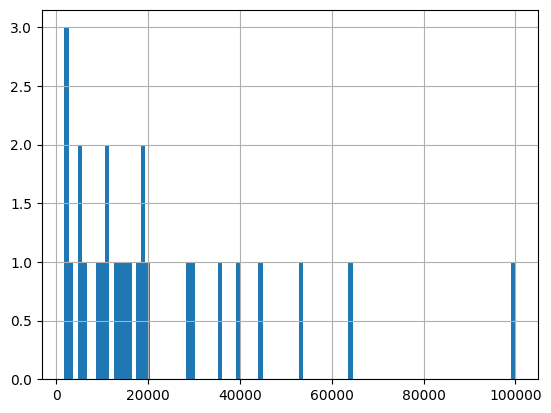

In [101]:
unfiltered_categories['Weight'].hist(bins=100)

In [102]:
#Unfiltered cats max, min and average
max_weight = unfiltered_categories['Weight'].max()  # Maximum value
min_weight = unfiltered_categories['Weight'].min()  # Minimum value
average_weight = unfiltered_categories['Weight'].mean()  # Average value

print(np.quantile(unfiltered_categories['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

15130.0
Max: 99954
Min: 1778
Average: 22058.11111111111


In [103]:
#Criamos a rede entre generos diferentes  
categories_filtered = study_categories[study_categories['Source'] != study_categories['Target']]
categories_filtered.to_csv('filtered_csv_file.csv', index=False)

In [104]:
file_path = 'filtered_csv_file.csv'
filtered_categories = pd.read_csv(file_path)

<Axes: >

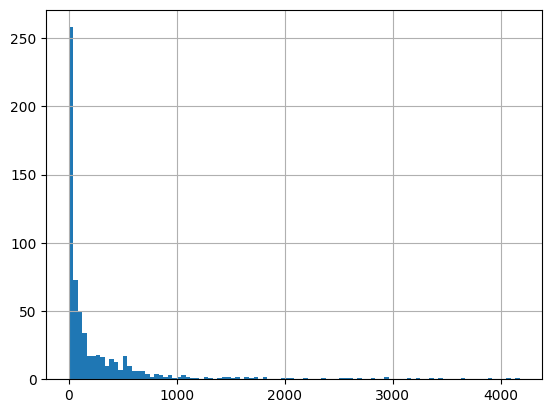

In [105]:
filtered_categories['Weight'].hist(bins=100)

In [106]:
filtered_categories.sort_values(by='Weight', ascending=False).head(10)

,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
238,"Health, Mind & Body",Religion & Spirituality,3895
261,History,Nonfiction,3665
424,Nonfiction,Religion & Spirituality,3445
414,Nonfiction,"Health, Mind & Body",3375
39,Biographies & Memoirs,Literature & Fiction,3226
492,Religion & Spirituality,Nonfiction,3160
334,Literature & Fiction,Biographies & Memoirs,2962
235,"Health, Mind & Body",Nonfiction,2937


In [107]:
#We observe the data and compare it with the previous ones
max_weight = filtered_categories['Weight'].max()  
min_weight = filtered_categories['Weight'].min()  
average_weight = filtered_categories['Weight'].mean()  

print(np.quantile(filtered_categories['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

76.5
Max: 4173
Min: 1
Average: 300.94827586206895


In [198]:
# 4 communities were found in the filtered genre-genre network
file_path = 'modularidade_rede_categoria_categoria_filtrada.csv'
filtered_csv_modularity = pd.read_csv(file_path)
filtered_csv_modularity.set_index('Id')

,modularity_class
Id,
Arts & Photography,2
Biographies & Memoirs,1
Business & Investing,1
Children's Books,0
Comics & Graphic Novels,0
Computers & Internet,2
"Cooking, Food & Wine",1
Engineering,2
Entertainment,0


In [199]:
#We group together genres that are from the same community, so we know how they are composed
grouped_genres = filtered_csv_modularity.groupby('modularity_class')
groups = {name: group for name, group in grouped_genres}
groups

{0:                            Id  modularity_class
 3            Children's Books                 0
 4     Comics & Graphic Novels                 0
 8               Entertainment                 0
 12                     Horror                 0
 14       Literature & Fiction                 0
 16        Mystery & Thrillers                 0
 21                    Romance                 0
 23  Science Fiction & Fantasy                 0
 25                      Teens                 0,
 1:                          Id  modularity_class
 1     Biographies & Memoirs                 1
 2      Business & Investing                 1
 6      Cooking, Food & Wine                 1
 9       Health, Mind & Body                 1
 10                  History                 1
 13                      Law                 1
 15                 Medicine                 1
 17               Nonfiction                 1
 20  Religion & Spirituality                 1
 24                   Sports     

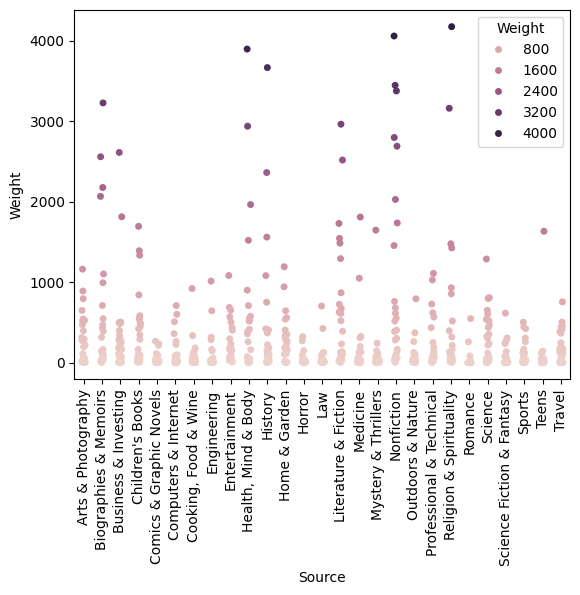

In [200]:
#A stripplot was created based on categories_filtered 
sns.stripplot(data=categories_filtered, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

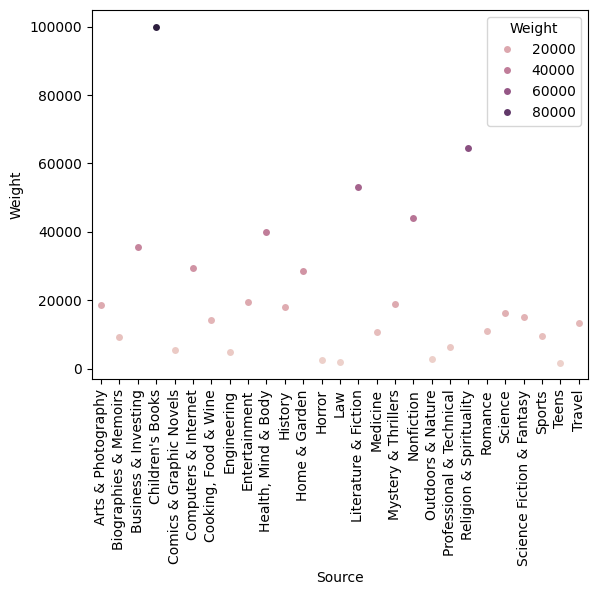

In [201]:
#A stripplot was created based on unfiltered_categories 
sns.stripplot(data=unfiltered_categories, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

In [202]:
# The following to steps were created with the aim to compare and analyse the genre relation when books are the same genre and when they are from different genre
# Step 1 - We create a new column in study_categories so that we can know wich wich objects that are related are form the same/ different genre
study_categories['Genre Relation'] = np.where(study_categories['Source'] == study_categories['Target'],'Same Genre', 'Different Genre')

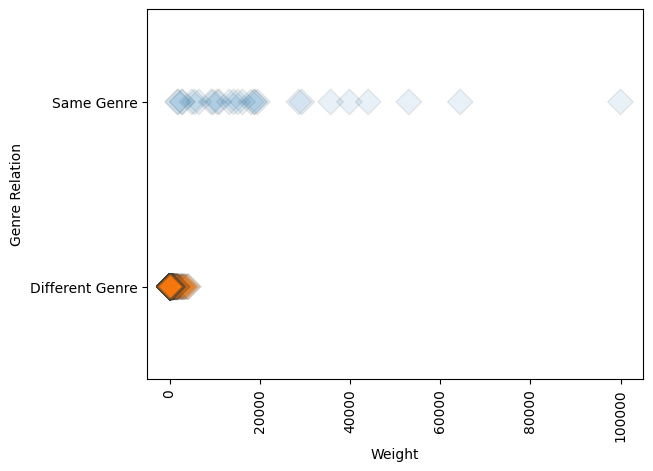

In [203]:
#Step 2 - Creation of a Strippplot -Opens the possibility to visualy analyse the existing relation between genre and weight
sns.stripplot(data=study_categories, x='Weight', y='Genre Relation', hue='Genre Relation', jitter=False, s=13, marker="D", linewidth=1, alpha=.1,)
plt.xticks(rotation=90)
plt.show()

### Q2 -  What different genres are often bought together?
--- Let's normalize the data ---

In [204]:
# Let's refresh our memory
book_categories

categories
Children's Books             30496
Nonfiction                   23670
Religion & Spirituality      23551
Literature & Fiction         21887
Health, Mind & Body          16707
Business & Investing         14745
Home & Garden                10995
History                      10481
Computers & Internet         10441
Entertainment                 9075
Biographies & Memoirs         9022
Arts & Photography            8999
Science                       8245
Travel                        7083
Mystery & Thrillers           6822
Medicine                      5426
Science Fiction & Fantasy     5401
Cooking, Food & Wine          5209
Sports                        4148
Professional & Technical      4102
Romance                       3833
Engineering                   2774
Comics & Graphic Novels       2216
Outdoors & Nature             1665
Law                           1495
Teens                         1188
Horror                        1146
Actors & Actresses               1
Name: cou

In [205]:
# To normalize the data we need to evaluate the weights
book_categories_df = book_categories.reset_index()
book_categories_df.columns = ['Category', 'Value']

In [206]:
#From this dataframe let's compare the weights and see how much they've changed. Is the heaviest relation still the same?
merged_df = pd.merge(filtered_categories, book_categories_df, left_on='Source', right_on='Category', how='left')
merged_target = pd.merge(merged_df, book_categories_df, left_on='Target', right_on='Category', how='left')
merged_target['Min_value'] = merged_target[['Value_x', 'Value_y']].min(axis=1)
merged_target['Max_value'] = merged_target[['Value_x', 'Value_y']].max(axis=1)
merged_target['Normalized_weight'] = (merged_target['Weight']/merged_target['Min_value'])
merged_target

,Source,Target,Weight,Category_x,Value_x,Category_y,Value_y,Min_value,Max_value,Normalized_weight
0,Arts & Photography,Biographies & Memoirs,473,Arts & Photography,8999,Biographies & Memoirs,9022,8999,9022,0.052561
1,Arts & Photography,Business & Investing,276,Arts & Photography,8999,Business & Investing,14745,8999,14745,0.030670
2,Arts & Photography,Children's Books,650,Arts & Photography,8999,Children's Books,30496,8999,30496,0.072230
3,Arts & Photography,Comics & Graphic Novels,114,Arts & Photography,8999,Comics & Graphic Novels,2216,2216,8999,0.051444
4,Arts & Photography,Computers & Internet,198,Arts & Photography,8999,Computers & Internet,10441,8999,10441,0.022002
...,...,...,...,...,...,...,...,...,...,...
633,Travel,Religion & Spirituality,176,Travel,7083,Religion & Spirituality,23551,7083,23551,0.024848
634,Travel,Science,249,Travel,7083,Science,8245,7083,8245,0.035155
635,Travel,Science Fiction & Fantasy,1,Travel,7083,Science Fiction & Fantasy,5401,5401,7083,0.000185
636,Travel,Sports,504,Travel,7083,Sports,4148,4148,7083,0.121504


In [207]:
#sorce - target - normalized weight
merged_target[['Source','Target','Normalized_weight']].sort_values(by='Normalized_weight', ascending=False).head(10)

,Source,Target,Normalized_weight
100,Children's Books,Teens,1.425926
594,Teens,Children's Books,1.374579
537,Science,Outdoors & Nature,0.479279
449,Outdoors & Nature,Science,0.476877
326,Law,Nonfiction,0.471572
418,Nonfiction,Law,0.456187
415,Nonfiction,History,0.387081
191,Engineering,Science,0.365537
39,Biographies & Memoirs,Literature & Fiction,0.357570
261,History,Nonfiction,0.349680


In [208]:
#  source - target - Original weight
merged_target[['Source','Target','Weight']].sort_values(by ='Weight', ascending=False).head(10)

,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
238,"Health, Mind & Body",Religion & Spirituality,3895
261,History,Nonfiction,3665
424,Nonfiction,Religion & Spirituality,3445
414,Nonfiction,"Health, Mind & Body",3375
39,Biographies & Memoirs,Literature & Fiction,3226
492,Religion & Spirituality,Nonfiction,3160
334,Literature & Fiction,Biographies & Memoirs,2962
235,"Health, Mind & Body",Nonfiction,2937


In [209]:
analysis_normalized_df = merged_target[['Source','Target','Normalized_weight']]

In [210]:
analysis_unnormalized_df = merged_target[['Source','Target','Weight']]

In [211]:
analysis_normalized_df ['pair'] = analysis_normalized_df .apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)

duplicated_pairs = analysis_normalized_df[analysis_normalized_df .duplicated('pair', keep=False)]

result = duplicated_pairs.loc[duplicated_pairs.groupby('pair')['Normalized_weight'].idxmax()]

result = result.drop(columns=['pair'])
result.sort_values(by='Normalized_weight', ascending=False).head(10)

C:\Users\Joana Okica\AppData\Local\Temp\ipykernel_22144\1729897931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_normalized_df ['pair'] = analysis_normalized_df .apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)


,Source,Target,Normalized_weight
100,Children's Books,Teens,1.425926
537,Science,Outdoors & Nature,0.479279
326,Law,Nonfiction,0.471572
415,Nonfiction,History,0.387081
191,Engineering,Science,0.365537
39,Biographies & Memoirs,Literature & Fiction,0.357570
345,Literature & Fiction,Horror,0.341187
368,Medicine,"Health, Mind & Body",0.333395
315,Law,Business & Investing,0.284950
35,Biographies & Memoirs,History,0.283529


In [212]:
analysis_unnormalized_df['pair'] = analysis_unnormalized_df.apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)

# Encontrar os pares duplicados
duplicated_pairs = analysis_unnormalized_df[analysis_unnormalized_df.duplicated('pair', keep=False)]

# Seleciono a linha com o maior valor de Normalized_weight para cada par
result = duplicated_pairs.loc[duplicated_pairs.groupby('pair')['Weight'].idxmax()]


result = result.drop(columns=['pair'])
result.sort_values(by='Weight', ascending=False).head(10)

C:\Users\Joana Okica\AppData\Local\Temp\ipykernel_22144\3377877263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_unnormalized_df['pair'] = analysis_unnormalized_df.apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)


,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
424,Nonfiction,Religion & Spirituality,3445
414,Nonfiction,"Health, Mind & Body",3375
39,Biographies & Memoirs,Literature & Fiction,3226
407,Nonfiction,Business & Investing,2797
419,Nonfiction,Literature & Fiction,2689
35,Biographies & Memoirs,History,2558
42,Biographies & Memoirs,Nonfiction,2176
45,Biographies & Memoirs,Religion & Spirituality,2066


## Network Product-Product

----- Process to create network product-product ----- Escolhemos que parte do dataset vamos estudar para a relação produto-produto ------

In [213]:
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152488,9997053060,2
152489,9999366651,2
152490,B00008JYQ3,6
152491,B00008NRHJ,5


In [214]:
book_exploded.similarities.nunique()                                    

283724

In [215]:
# Seleciono os produtos que se encontram em id e em similarities
similarities_set = set(book_exploded['similarities'])

filtered_df = book[book['id'].isin(similarities_set)]

id_set = set(filtered_df['id'])
filtered_df
#Até aqui o id está limpo agora falta as similarities

,id,group,title,similarities,categories,reviews,similarity_count
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[],5
11,1590770218,Book,Fantastic Food with Splenda : 160 Great Recipe...,"[0871319640, 0399530258, 1590770536, 158040197...","Health, Mind & Body","[A2V9UBVMQFDV20 - 5, A3NXQLHXJZO5FB - 5, A1RNV...",5
14,1559362022,Book,Wake Up and Smell the Coffee,"[1559360968, 1559361247, 1559360828, 155936101...",Literature & Fiction,"[A2IGOA66Y6O8TQ - 5, A2OIN4AUH84KNE - 5, A2HN3...",5
19,3895780812,Book,"Computed Tomography : Fundamentals, System Tec...","[0865778973, 0071343547, 0721662854, 072168173...",Medicine,[AWHGCJOOZBTB5 - 5],5
25,1590930509,Book,Chicken Little,"[0439078172, 0899192254, 0688070450, 089919349...",Children's Books,[A1SMZFT2R1QBRW - 4],5
...,...,...,...,...,...,...,...
516482,1571201718,Book,"250 Continuous-Line Quilting Designs for Hand,...","[1571201467, 0486417026, 157120184X, 048628013...",Home & Garden,"[A2Z2EMOAQLNBYK - 4, A14OJS0VWMOSWO - 5, A3VDI...",5
516483,1885106378,Book,Flyfisher's Guide to Wyoming (Flyfisher's Guides),"[155821545X, 1885106955, 1585745308, 157188164...",Outdoors & Nature,"[A2PPY3R9YKGGIU - 5, A282VT5BUQDFPT - 5]",5
516490,158483000X,Book,Needless Casualties of War,"[1584830492, 096290497X, 0768422329, 158483037...",Religion & Spirituality,"[A2IKNL1OQ0HOP4 - 4, A3GSI8Q25U5438 - 5, A1MH4...",5
516503,2060000912,Book,Michelin the Green Guide Berlin and Potsdam (M...,"[1886705410, 0789494302, 2060000335, 188659007...",Travel,[A33WM7N3DJMTI4 - 5],5


In [216]:
#Façamos agora o mesmo que a linha anterior mas para as similaridades
filtered_exploded = filtered_df.explode('similarities')
result = filtered_exploded[filtered_exploded['similarities'].isin(id_set)]
result = result[['id','similarities']]
result

,id,similarities
4,1577943082,157794349X
4,1577943082,1577941829
14,1559362022,1559360968
14,1559362022,1559361247
14,1559362022,1559360828
...,...,...
516503,2060000912,1886705410
516503,2060000912,1886590079
516503,2060000912,2061565301
516504,4770027613,158685027X


In [217]:
len(set.intersection(set(result.id),set(result.similarities)))


24353

In [218]:
#restricao = count_ids_by_similarities[count_ids_by_similarities['id'] <= 4]
#print(len(restricao))

#ids_validos = restricao['similarities'].isin(book['id'])
#restricao_filtrada = restricao[ids_validos]

#similaridades_validas = restricao_filtrada['similarities'].to_list()

#book_filtrado = book[book['id'].isin(ids_validos)] #book[book['id'].isin(similaridades_validas)]

#bf_explo_similarities = book_filtrado.explode('similarities')
#bf_explo_similarities
#trial3 = bf_explo_similarities[bf_explo_similarities['similarities'].isin(similaridades_validas)]


In [219]:
#We create the csv that shows the relationship between products. We call this file produts_relation
#rede com restriçao 4
#products_network = trial3[['id','similarities']]
result.to_csv('file_productsRelation.csv')
result

,id,similarities
4,1577943082,157794349X
4,1577943082,1577941829
14,1559362022,1559360968
14,1559362022,1559361247
14,1559362022,1559360828
...,...,...
516503,2060000912,1886705410
516503,2060000912,1886590079
516503,2060000912,2061565301
516504,4770027613,158685027X


### Q3 - Modelação em rede permite ir além das recomendações quem comprou X também comprou Y?
-- Como responder fazer histograma com número de nós por comunidade. Quantas comunidades têm mais de 5 elementos? --

In [234]:
# Foi importado do gephi o ficheiro que mostra a modularidade da rede produto-produto
file_path ='modularidade_rede_produto.csv'
product_h = pd.read_csv(file_path)
product_h = product_h.set_index('Id')
product_h = product_h.rename(columns={'Id': 'id'})
product_h


,modularity_class
Id,
827229534,317
804215715,317
156101074X,317
687023955,317
687074231,317
...,...
007219183X,460
1564553078,719
312304145,2398


<Axes: >

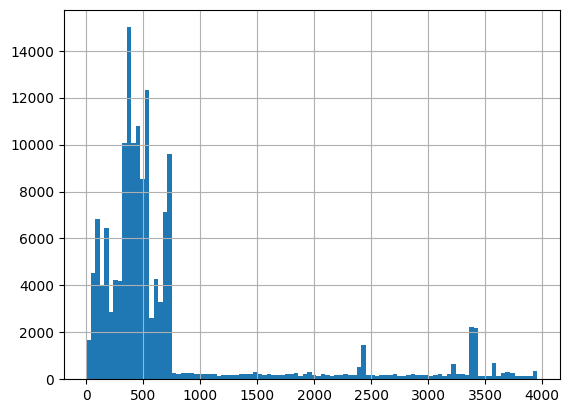

In [235]:
product_h['modularity_class'].hist(bins=100)

In [237]:
# Organizo as comunidades. Numero total de comunidades 3957
test_group = product_h.groupby('modularity_class')
modularity_grouped = {name: group for name, group in test_group}
modularity_grouped

{0:             modularity_class
 Id                          
 1590770218                 0
 871319640                  0,
 1:             modularity_class
 Id                          
 471150274                  1
 013061081X                 1
 1852331666                 1
 70121893                   1
 1584502657                 1,
 2:             modularity_class
 Id                          
 439240751                  2
 439240727                  2
 439240719                  2
 439240700                  2
 61062499                   2
 439240735                  2
 439240743                  2
 439472199                  2
 439492270                  2
 61063959                   2
 61062928                   2
 006106632X                 2
 61068268                   2
 61066060                   2
 61065447                   2
 61058769                   2
 61066729                   2
 61065579                   2
 61065404                   2
 61065595                   2

In [238]:
# Calcular as estatísticas desejadas
elementos_por_comunidade = test_group.size()

media_elementos_por_comunidade = elementos_por_comunidade.mean()
min_elementos_por_comunidade = elementos_por_comunidade.min()
max_elementos_por_comunidade = elementos_por_comunidade.max()

print("Média:", media_elementos_por_comunidade)
print("Mínimo:", min_elementos_por_comunidade)
print("Máximo:", max_elementos_por_comunidade)
# Assim sabemos que no maximo uma comunidade tem cerca de 4736 elemnetos, no minimo tem 2 e por media as comunidade têm cerca de 38 elemntos

Média: 38.227445034116755
Mínimo: 2
Máximo: 4736


In [247]:
test_group = product_h.groupby('modularity_class').size()
quantidade_grupo = test_group[test_group>5].count()

print(quantidade_grupo, "das 3957 comunidades, têm mais de 5 elementos")

1291 das 3957 comunidades, têm mais de 5 elementos


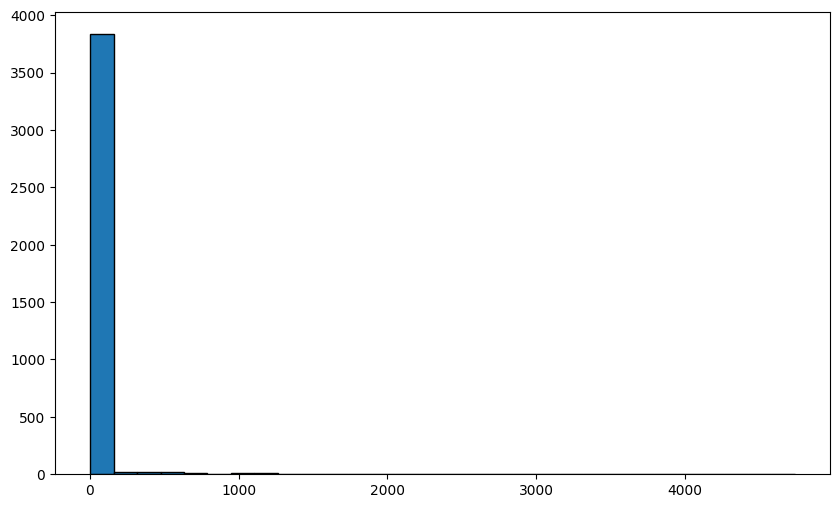

In [240]:
test_group = product_h.groupby('modularity_class').size()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(test_group, bins=30, edgecolor='black')
plt.show()

### Q4 - Qual a variabilidade de género dentro das comunidades?
-- Como responder para cada comunidade obter o género dos livros e contar número de géneros diferentes, bem como a percentagem dominante --

In [241]:
book['id'] = book['id'].apply(lambda id_value: id_value[1:] if id_value.isdigit() and id_value.startswith('0') else id_value)
book


,id,group,title,similarities,categories,reviews,similarity_count
0,827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
1,738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9...",5
3,842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4],5
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[],5
5,486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI...",5
...,...,...,...,...,...,...,...
516511,6176909,Book,House of Cards,"[0006471641, 0006477097, B00009MGGI, 000649799...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS...",5
516512,786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 0793529395, 0793585031, 0634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN...",4
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4],2
516521,60537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5


In [242]:
# obter o género dos livros e contar número de géneros diferentes -  fazer merge com a original
# Assuming 'id' is the common column between both dataframes and is set as the index in product_h.
#O problema encontrado: numero de produtos diminui imenso(verifiquei que não há duplicados então nao sei qual pode ser o problema) - JA
trial = product_h.merge(book, right_on='id', left_index=True, how='left')
trial

,modularity_class,id,group,title,similarities,categories,reviews,similarity_count
0,317,827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
151887,317,804215715,Book,Witness of Preaching,"[0687336481, 0827229534, 156101074X, 080280132...",Religion & Spirituality,"[A1TO3ZZR8OCT5Q - 5, AKNWBSH0XOV0O - 5, A3P062...",5
230355,317,156101074X,Book,The Preaching Life,"[1561011576, 1561011673, 0687336481, 066422886...",Religion & Spirituality,"[A2YW034WITERZV - 5, A3O8EU8VP833XL - 5, AZNB8...",5
110967,317,687023955,Book,The Four Pages of the Sermon: A Guide to Bibli...,"[156101074X, 0804215715, 0827229534, 068707423...",Religion & Spirituality,"[A1HCDBN8IQNAU - 5, A1YQCMHTVDVC64 - 3, A1EVXA...",5
418048,317,687074231,Book,Performing the Word: Preaching As Theatre,"[0687023955, 0827229534, 0664222641, 080284152...",Religion & Spirituality,"[A2YL693G8I5WQO - 5, A249XSNS8KJ7N3 - 5]",5
...,...,...,...,...,...,...,...,...
511984,460,007219183X,Book,Apache Server 2.0: A Beginner's Guide,"[0672323559, 0072223448, 1861007221, 078214137...",Computers & Internet,"[A23WXUPDTBKP9S - 5, A36DIMVV0RLOM4 - 3, A1PCO...",5
513836,719,1564553078,Book,The Future of God: The Reclaiming of Spiritual...,"[0375413189, 0345391691, 0345384563, 034540604...",Religion & Spirituality,"[A22F47HRANO8EH - 4, A2KA9AWFSHK1OF - 4]",5
516454,2398,312304145,Book,"The Murad Method: Wrinkle-Proof, Repair, and R...","[0312331061, 0312334613, 1561709530, 044667776...","Health, Mind & Body","[A3A64AFD4K2ONK - 5, AFVQZQ8PW0L - 5, A1Y3Y7DN...",5
516481,522,849995949,Book,Leadership Promises for Every Day,"[0718006593, 0785263500, 0785274324, 078526419...",Religion & Spirituality,"[A1LMWXP2HMNMP3 - 5, A10WXIR6DPY406 - 5, AI22V...",5


In [243]:
len([elemento for elemento in product_h.index.to_list()if elemento not in book.id ])

151266

In [244]:
teste2 = trial[['id', 'categories', 'modularity_class']]
teste2

,id,categories,modularity_class
0,827229534,Religion & Spirituality,317
151887,804215715,Religion & Spirituality,317
230355,156101074X,Religion & Spirituality,317
110967,687023955,Religion & Spirituality,317
418048,687074231,Religion & Spirituality,317
...,...,...,...
511984,007219183X,Computers & Internet,460
513836,1564553078,Religion & Spirituality,719
516454,312304145,"Health, Mind & Body",2398
516481,849995949,Religion & Spirituality,522


In [245]:
agrupar = {name: group for name, group in teste2.groupby('modularity_class')}
agrupar

{0:                 id            categories  modularity_class
 11      1590770218   Health, Mind & Body                 0
 363215   871319640  Cooking, Food & Wine                 0,
 1:                 id            categories  modularity_class
 29       471150274           Engineering                 1
 332694  013061081X  Computers & Internet                 1
 85747   1852331666  Computers & Internet                 1
 508747    70121893           Engineering                 1
 356835  1584502657  Computers & Internet                 1,
 2:                 id        categories  modularity_class
 32       439240751  Children's Books                 2
 111895   439240727  Children's Books                 2
 484036   439240719  Children's Books                 2
 65464    439240700  Children's Books                 2
 359298    61062499  Children's Books                 2
 135074   439240735  Children's Books                 2
 460588   439240743  Children's Books                 2
 

In [253]:
# Analiso quais os generos mais relevantes por comunidade, quantos generos unicos aparecem
unique_genres = teste2.groupby('modularity_class')['categories'].nunique().reset_index(name='unique_genres')
most_common_genre = teste2.groupby('modularity_class')['categories'].agg(lambda x: x.value_counts().idxmax()).reset_index(name='most_common_genre')
genre_counts = teste2.groupby('modularity_class')['categories'].value_counts().unstack(fill_value=0).reset_index()

genre_analysis = unique_genres.merge(most_common_genre, on='modularity_class')
genre_analysis = genre_analysis.merge(genre_counts, on='modularity_class')

genre_analysis[['modularity_class','unique_genres','most_common_genre']]

,modularity_class,unique_genres,most_common_genre
0,0,2,"Health, Mind & Body"
1,1,2,Computers & Internet
2,2,1,Children's Books
3,3,1,Children's Books
4,4,2,Mystery & Thrillers
...,...,...,...
3952,3952,1,Mystery & Thrillers
3953,3953,3,Science Fiction & Fantasy
3954,3954,1,Biographies & Memoirs
3955,3955,1,Literature & Fiction


In [ ]:
category_counts = teste2['categories'].value_counts()
category_counts

categories
Children's Books             16031
Religion & Spirituality      14400
Nonfiction                   13509
Literature & Fiction         11453
Health, Mind & Body           9305
Business & Investing          7384
Home & Garden                 6759
Computers & Internet          6326
History                       6103
Entertainment                 5582
Arts & Photography            5421
Science                       4705
Biographies & Memoirs         4694
Travel                        3839
Mystery & Thrillers           3559
Cooking, Food & Wine          3162
Science Fiction & Fantasy     3099
Medicine                      2686
Romance                       2633
Sports                        2450
Professional & Technical      2362
Comics & Graphic Novels       1528
Engineering                   1302
Outdoors & Nature             1107
Law                            686
Horror                         634
Teens                          617
Name: count, dtype: int64

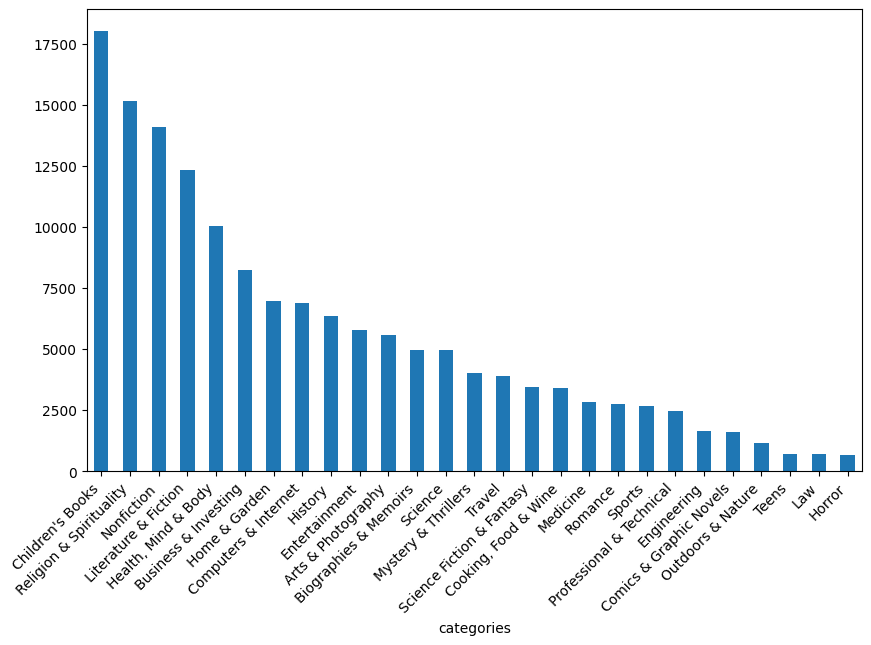

In [255]:
plt_final = teste2['categories'].value_counts()
plt_final.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#median = final_result['count'].median()
#maximum = final_result['count'].max()
#minimum = final_result['count'].min()
#print(median, maximum, minimum)


In [ ]:
#trial = book.merge(product_h, left_on='id', right_index=True, how='inner')
#trial

,id,group,title,similarities,categories,reviews,similarity_count,modularity_class
0,827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5,82
1,738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9...",5,981
3,842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4],5,82
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[],5,171
7,231118597,Book,Losing Matt Shepard,"[B000067D0Y, 0375727191, 080148605X, 156023257...",Nonfiction,"[A2F1X6YFCJZ1FH - 5, A1OZQCZAK21S6M - 5, AL5D5...",5,15
...,...,...,...,...,...,...,...,...
516502,465028721,Book,The Diligent: A Voyage through the Worlds of t...,"[0684835657, 0198205287, 0521627249, 052159649...",History,"[A267SCCYKZLW2B - 4, A1EC5AQQS9XURP - 4, A2UDS...",5,961
516503,2060000912,Book,Michelin the Green Guide Berlin and Potsdam (M...,"[1886705410, 0789494302, 2060000335, 188659007...",Travel,[A33WM7N3DJMTI4 - 5],5,1036
516504,4770027613,Book,Japanese Country Style: Putting New Life into ...,"[0804832625, 158685027X, 4770023537, 081183675...",Home & Garden,[A39B12UH2GKX3O - 5],5,759
516510,310208084,Book,Ten Time Bombs,"[0310479711, 0802436471, 0684856093, 155874777...",Children's Books,[A90BU54VLIVNS - 5],5,1432
